In [42]:
import pandas as pd

In [43]:
df=pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [44]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [45]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [46]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [47]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

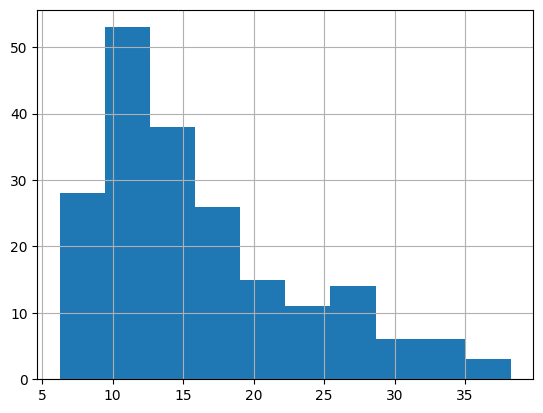

In [50]:
df['Na_to_K'].hist()   

In [ ]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [ ]:
df['Sex']=df['Sex'].map({'F':0,'M':1})

In [ ]:
df['BP']=df['BP'].map({'LOW':0,'NORMAL':1,'HIGH':2})

In [ ]:
df['Cholesterol']=df['Cholesterol'].map({'NORMAL':0,'HIGH':1})
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY
...,...,...,...,...,...,...
195,56,0,0,1,11.567,drugC
196,16,1,0,1,12.006,drugC
197,52,1,1,1,9.894,drugX
198,23,1,1,0,14.020,drugX


In [ ]:
x=df.drop(['Drug'],axis=1)

In [ ]:
y=df['Drug']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(160, 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree


In [ ]:
dd=DecisionTreeClassifier()


In [ ]:
dd.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred=dd.predict(x_test)
y_pred


array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns


Text(0.5, 80.7222222222222, 'predicted')

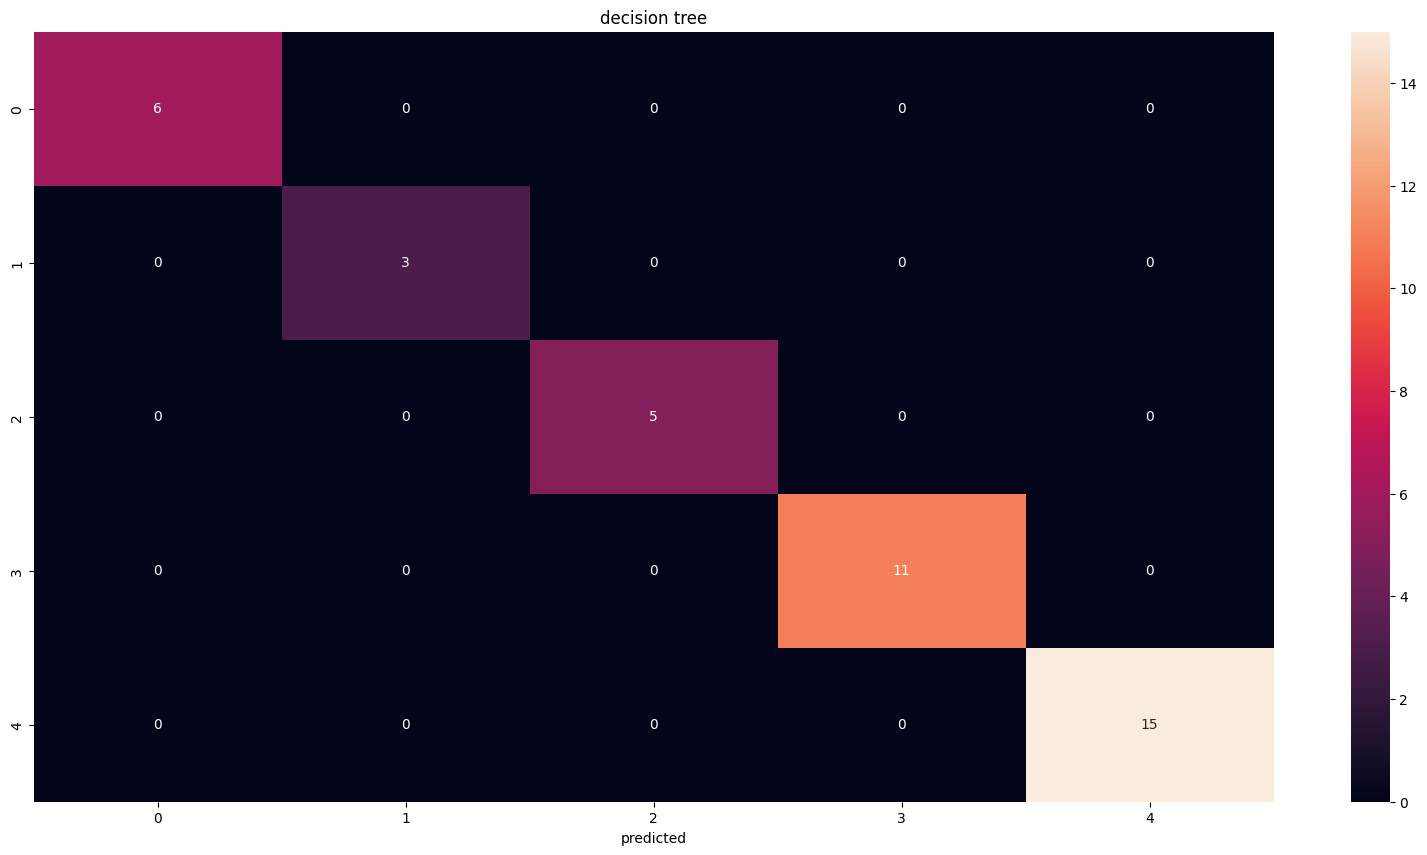

In [ ]:
plt.figure(figsize=(20,10))
plt.title("decision tree")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel("predicted")

In [ ]:
from sklearn import tree

[Text(0.6666666666666666, 0.9, 'x[4] <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 1.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 0.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.7777777777777778, 0.7, 'gini = 0.0\nsamples

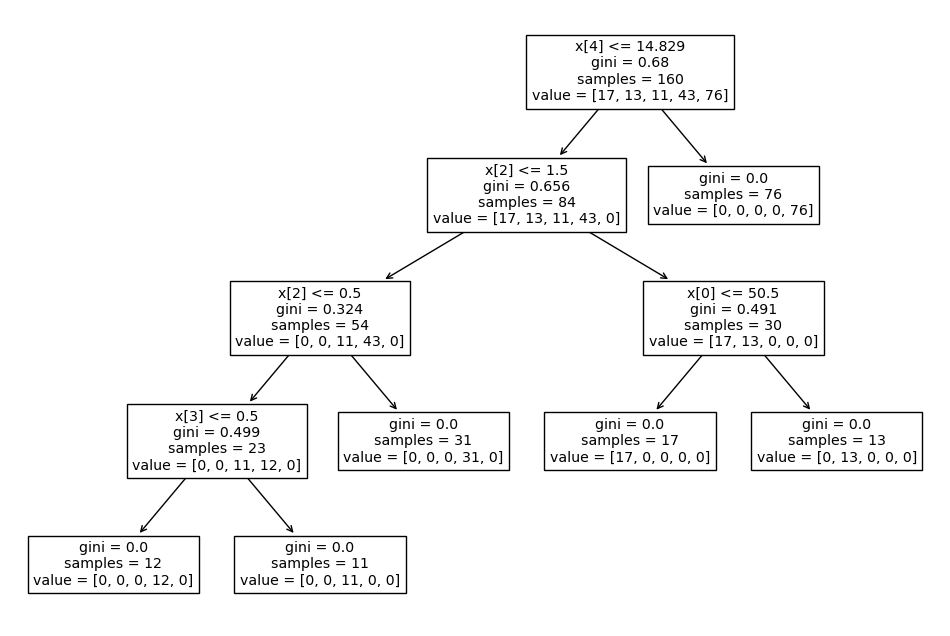

In [ ]:
plt.figure(figsize=(12,8))

plot_tree(dd)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]], dtype=int64)

In [ ]:
params = {'criterion':['gini','entropy'],
          'max_depth':[1,2,3,4,5,6,7,8],
          'min_samples_split':[2,3,4,5,6,7],
          'min_samples_leaf':[1,2,3,4,5,6,7]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_cv = GridSearchCV(dd, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_cv.best_score_

0.99375

In [ ]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=2)

In [ ]:
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

[Text(0.6666666666666666, 0.9, 'x[4] <= 14.829\nentropy = 1.923\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 1.5\nentropy = 1.762\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 0.5\nentropy = 0.729\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\nentropy = 0.999\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.777777777777

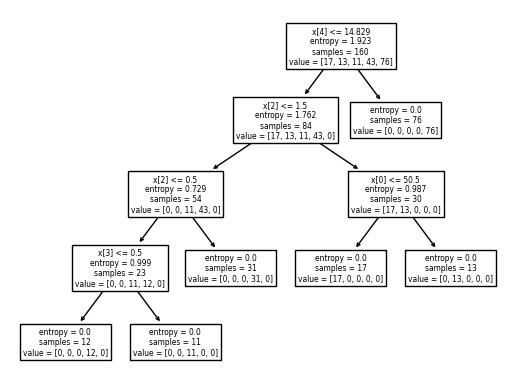

In [ ]:
plot_tree(dt2)